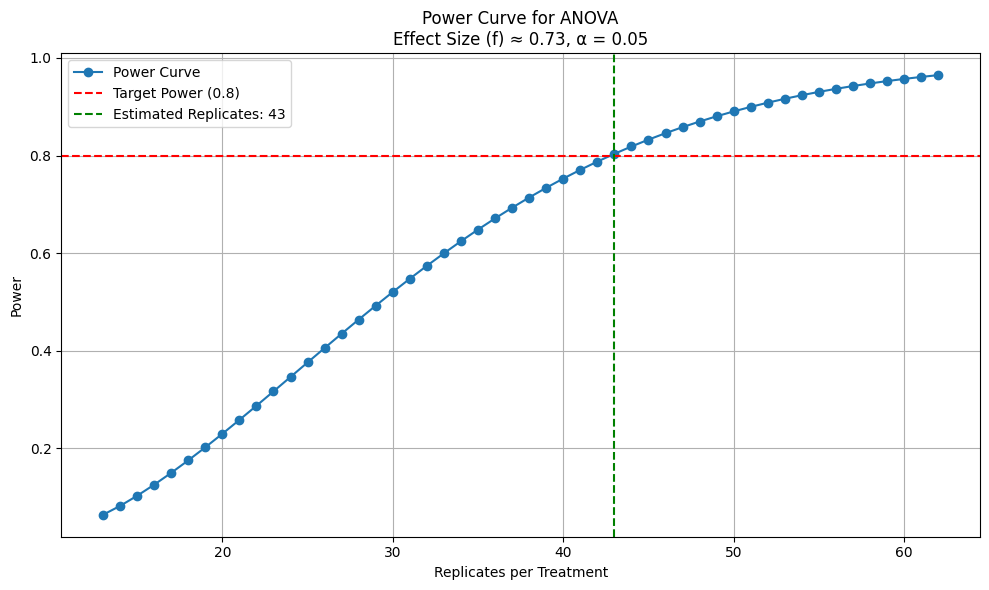

📌 Current Experiment Power: 0.35
📌 Estimated replicates per treatment needed for 80% power: 43 to detect 0.5


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import FTestAnovaPower

# === Parameters ===
CSV_INPUT_FILE = "experiment_data.csv"
effect_diff = 0.5  # Meaningful effect size in seconds I'd like to detect
target_power = 0.8
alpha = 0.05

# === Load data ===
df = pd.read_csv(CSV_INPUT_FILE)

# === Compute group info ===
n_groups = df["Treatment"].nunique()
n_rep_per_group = 2  # Current replicates per treatment
nobs = n_groups * n_rep_per_group

# Estimate pooled within-treatment standard deviation
group_std = (
    df.groupby(["Treatment", "Replicate"])["Avg. Execution Time"]
    .mean()
    .groupby("Treatment")
    .std()
)
pooled_std = group_std.mean()

# === Standardized effect size (Cohen's f) ===
cohen_f = effect_diff / pooled_std

# === Power analysis ===
anova_power = FTestAnovaPower()
current_power = anova_power.solve_power(effect_size=cohen_f, k_groups=n_groups, nobs=nobs, alpha=alpha)
required_nobs_per_group = anova_power.solve_power(
    effect_size=cohen_f,
    k_groups=n_groups,
    power=target_power,
    alpha=alpha
)
required_replicates = int(np.ceil(required_nobs_per_group))

# === Power curve ===
replicates_range = np.arange(2, required_replicates + 20)
power_curve = anova_power.power(
    effect_size=cohen_f,
    k_groups=n_groups,
    nobs=replicates_range,
    alpha=alpha
)

# === Plot ===
plt.figure(figsize=(10, 6))
plt.plot(replicates_range, power_curve, marker='o', label='Power Curve')
plt.axhline(y=target_power, color='red', linestyle='--', label=f'Target Power ({target_power})')
plt.axvline(x=required_replicates, color='green', linestyle='--', label=f'Estimated Replicates: {required_replicates}')
plt.xlabel('Replicates per Treatment')
plt.ylabel('Power')
plt.title(f'Power Curve for ANOVA\nEffect Size (f) ≈ {cohen_f:.2f}, α = {alpha}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"📌 Current Experiment Power: {current_power:.2f}")
print(f"📌 Estimated replicates per treatment needed for 80% power: {required_replicates} to detect {effect_diff}")